## Module 4: *(Template)*

## Team Members:
Daniel Garcia-Soliz and Jack Hancock

## Project Title:




## Project Goal:
Use epidemiological modeling to estimate transmission and recovery parameters for MERS in Saudi Arabia between 2013 and 2014 and evaluate how well the models reproduce the observed case data.

## Disease Background:

Using your assigned disease, fill in the following bullet points. 

* Prevalence & incidence
    * Since August 2012 to August 2025, there have been 948 deaths due to MERS
    * 2628 reported cases across 27 different countries (https://www.emro.who.int/health-topics/mers-cov/mers-outbreaks.html)
    * The median/average age falls in 50-60 years old with a large majority of patients being male
* Economic burden
    * Countries with outbreaks of MERS see millions lost due to traveling/touring decrease. Example was in 2015 with the Republic of Korea losing 2.6 billion dollars. (https://pmc.ncbi.nlm.nih.gov/articles/PMC6560634/)
    * Hard hit cities (such as Jeddah or Riyadh) lost significant health care workers and overworked medical business. Furthermore, they would too suffer from loss of finance from loss of tourism in outbreaks. (https://pmc.ncbi.nlm.nih.gov/articles/PMC7102537/)
* Risk factors (genetic, lifestyle) & Societal determinants
    * Primary transmission occurs through camel-human interaction. Primary diseease in the middle east due to this. Outdoor lifestyle within the middle east increases risk. 
    * Heart disease and suspectible to diseases are seen. (https://pmc.ncbi.nlm.nih.gov/articles/PMC7164784/)
    * Working in a healthcare setting and having a smoking backround is also seen to increase respiratory disease. (https://www.cdc.gov/mers/about/index.html#:~:text=You%20may%20be%20at%20increased,camels%20(including%20touching%20or%20grooming))
* Symptoms
    * Common symptoms are cough, fever, shortness of breath/difficulty breathing.
    * Also seen is pnuemonia, nausea/vomiting, and potential kidney failure. (https://www.cdc.gov/mers/about/index.html)
* Diagnosis
    * Diagnosis mainly only occurs after 14 days of travel from the middle east or suspected contact with MERS patients (health care settings, planes, etc.(https://www.cdc.gov/mers/about/index.html)
    * Similar diagnosis to other respiratory pathogens, which are also commonly tested alongside due to symptoms which are reported. (https://www.cdc.gov/mers/php/laboratories/index.html)
* Biological mechanisms (anatomy, organ physiology, cell & molecular physiology)
    * Reported as a Zoonic virus (based off of animal disease/transmission)
    * Presented as a coronavirus with S proteins binding to host cells
    * Infects the respiratory tract by binding to the DPP4 receptor on these host cells.
    * Commonly triggers servere inflammation

## Dataset: 

*(Describe the data set you will analyze. Cite the source(s) of the data. Describe how the data was collected -- What techniques were used? What units are the data measured in? Etc.)*

SIR data saved to: C:\Users\danig\OneDrive\Desktop\UVA\UVA Fall 25\COMP\Module 4\MERS_SIR_Output.csv
        date  cumulative  incidence   S         I         R
0 2013-10-07         2.0        2.0 NaN  2.000000  0.000000
1 2013-10-14         3.0        1.0 NaN  2.857143  0.142857
2 2013-10-21         1.0        0.0 NaN  1.000000  0.000000
3 2013-10-28         2.0        1.0 NaN  1.928571  0.071429
4 2013-11-04         2.0        0.0 NaN  1.790816  0.209184


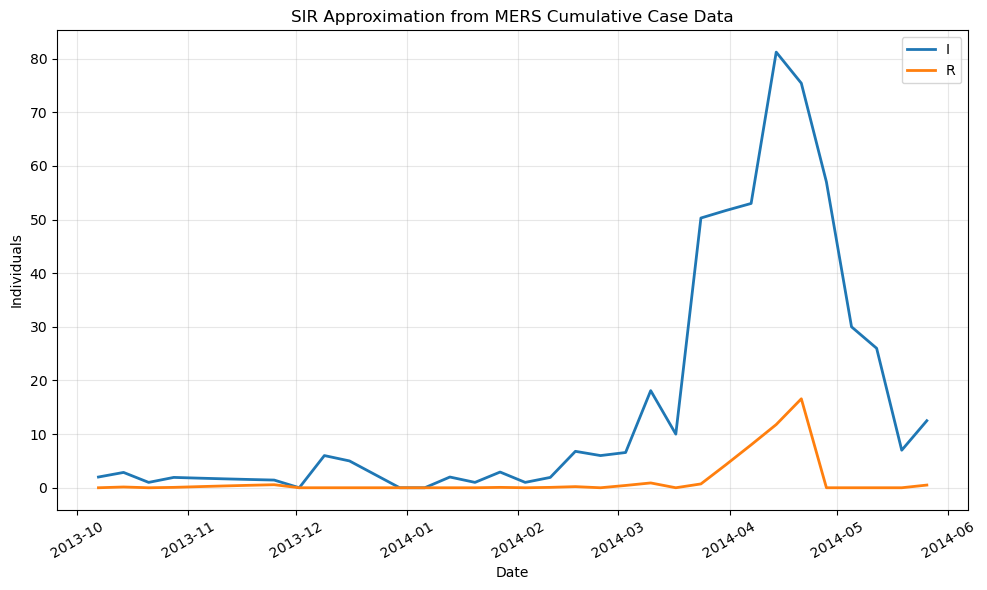

In [1]:
## LOAD YOUR DATASET HERE.

# 1. Read in the csv file of cumulative cases.

# 2. Use the convert_cumulative_to_SIR function to convert cumulative cases to approximate S, I, R at any given time.

# 3. Plot S, I, R over time.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

# ------------------------------------------------------------
# USER SETTINGS
# ------------------------------------------------------------

csv_path = r"C:\Users\danig\OneDrive\Desktop\UVA\UVA Fall 25\COMP\Module 4\MERS_Saudi_Arabia_data_2013_2014_new_cases.csv"

# Choose a population (or set to None)
population = None        # e.g., 33000000 for Saudi Arabia

# Model assumption for SIR conversion
infectious_period_days = 14   # assumption for MERS (you may change)
gamma = 1 / infectious_period_days
# ------------------------------------------------------------


def convert_cumulative_to_SIR(dates, cumulative, N=None, gamma=1/14):
    """Simple conversion from cumulative cases → S, I, R."""
    cumulative = np.asarray(cumulative, dtype=float)

    # incidence = new cases per day
    incidence = np.diff(cumulative, prepend=0)
    incidence[incidence < 0] = 0  # safety check

    # infectious count approximation
    I = np.zeros_like(incidence)
    I[0] = incidence[0]

    for t in range(1, len(incidence)):
        I[t] = I[t-1] + incidence[t] - gamma * I[t-1]
        I[t] = max(0, min(I[t], cumulative[t]))

    # removed (recovered + dead)
    R = cumulative - I

    # susceptible
    if N is not None:
        S = np.maximum(N - cumulative, 0)
    else:
        S = np.full_like(cumulative, np.nan)

    return pd.DataFrame({
        "date": pd.to_datetime(dates),
        "cumulative": cumulative,
        "incidence": incidence,
        "S": S,
        "I": I,
        "R": R
    })


# ------------------------------------------------------------
# LOAD CSV
# ------------------------------------------------------------
df = pd.read_csv(csv_path)

# Expect exactly two columns: date, confirmed_cases
df["date"] = pd.to_datetime(df["date"])
df = df.sort_values("date")

cumulative = df["confirmed_cases"].astype(float).values
dates = df["date"].values


# ------------------------------------------------------------
# CONVERT
# ------------------------------------------------------------
sir_df = convert_cumulative_to_SIR(dates, cumulative, N=population, gamma=gamma)

# save alongside input
output_path = Path(csv_path).with_name("MERS_SIR_Output.csv")
sir_df.to_csv(output_path, index=False)

print(f"SIR data saved to: {output_path}")
print(sir_df.head())


# ------------------------------------------------------------
# PLOT
# ------------------------------------------------------------
plt.figure(figsize=(10,6))

if not np.isnan(sir_df["S"]).all():
    plt.plot(sir_df["date"], sir_df["S"], label="S", linewidth=2)

plt.plot(sir_df["date"], sir_df["I"], label="I", linewidth=2)
plt.plot(sir_df["date"], sir_df["R"], label="R", linewidth=2)

plt.xlabel("Date")
plt.ylabel("Individuals")
plt.title("SIR Approximation from MERS Cumulative Case Data")
plt.legend()
plt.grid(alpha=0.3)
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Data Analyis: 

### Methods

*IN A SUMMARY, DESCRIBE THE METHODS YOU USED TO ANALYZE AND MODEL THE DATA.*


### Analysis
*(Describe how you analyzed the data. This is where you should intersperse your Python code so that anyone reading this can run your code to perform the analysis that you did, generate your figures, etc.)*

In [2]:
## PYTHON CODE TO BUILD AND FIT AN SIR MODEL GOES HERE. INTERSPERSE COMMENTS (IN MARKDOWN) TO EXPLAIN EACH STEP.

## Verify and validate your analysis: 

*(Describe how you checked to see that your analysis gave you an answer that you believe (verify). Describe how your determined if your analysis gave you an answer that is supported by other evidence (e.g., a published paper).*

## Conclusions and Ethical Implications: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## Limitations and Future Work: 
*(Think about the answer your analysis generated, draw conclusions related to your overarching question, and discuss the ethical implications of your conclusions.*

## NOTES FROM YOUR TEAM: 
*This is where our team is taking notes and recording activity.*

## QUESTIONS FOR YOUR TA: 
*These are questions we have for our TA.*